In [1]:
import pandas as pd
import numpy as np
import decimal 
from decimal import Decimal, localcontext
from fractions import Fraction
import math
import matplotlib.pyplot as plt
from itertools import chain
import csv

In [2]:
# df = pd.read_csv("semiprimes-1col.csv")
# #for row in df.iterrows():
#     #print(row)
#     #print(index)

# specific_column=df["semiprime"]
# print(specific_column[5])




In [3]:
# multiplicative order
# function for GCD
totalOddOrderAvg=[]
totalEvenOrderAvg=[]
avgProbSuccess = []
successProbList=[]
evenProbList =[]
oddProbList=[]
totalEvenList=[]
totalOddList = []
def Average(lst):
    return sum(lst) / len(lst)

def GCD (a, b ) :
    if (b == 0 ) :
        return a
    return GCD( b, a % b )

# Function return smallest + ve
# integer that holds condition
# A ^ k(mod N ) = 1
def multiplicativeOrder(A, N) :
    if (GCD(A, N ) != 1) :
        return -1

# result store power of A that raised
# to the power N-1
    result = 1
    K = 1
    while (K < N) :

# modular arithmetic
        result = (result * A) % N
# return smallest + ve integer
        if (result == 1) :
            return K
            break
# increment power
        K = K + 1
    
    return -1
    
# Driver program
A = 125454
N = 194335
print(multiplicativeOrder(A, N))

38866


In [4]:
#calculate factors of N
# SFA standard Function to calculate factors of N
def SFAcalculateFactors(N, a, r):
    # Calculate first candidate factor using GCD
    newR = r//2
    bigA = a ** newR
    #print(newR)
    #print(bigA)

    x = GCD(bigA - 1, N)
    if x == 1 or x == N:
        y = (N//x)
        
        return [x, y]
    # Calculate second candidate factor using GCD
    y = GCD(bigA + 1, N)
    #print(y)
    if y == 1 or y == N:
        y = (N//x)
        return [x, y]
    # If both candidate factors are not 1 or N, return both
    #if ((x).is_integer()) == True and((y).is_integer()):
        #x = int(x)
        #y = int(y)
                                       
    return [x, y]
    
    
# Driver code to test the function
N = 53155
a = 102
r = multiplicativeOrder(a, N)
if (r % 2) == 0:
    factors = SFAcalculateFactors(N, a, r)
    print("Even order("+str(r)+"): "+str(factors))
    
else:
    factors = SFAcalculateFactors(N, a, r)
    print("Odd order("+str(r)+"): "+ str(factors))



Even order(4252): [10631, 5]


In [5]:
def DOTCcalculateFactors(N, a, r):
    fullA=0
    for i in range(1,r):
        fullA =fullA + (a**(i))
        #print(fullA)
        
    # Calculate first candidate factor using GCD
    x = GCD(a - 1, N)
    #if x == 1 or x == N:
        #return [x]
    # Calculate second candidate factor using GCD with looped "fullA" variable 
            
    y = GCD((fullA) + 1, N)
    if y == 1 or y == N:
        y = (N//x)
        return [x, y]
    # If both candidate factors are not 1 or N, return both
    return [x, y]

N = 10033
a = 22

r = multiplicativeOrder(a, N)
if (r % 2) != 0:
    factors = DOTCcalculateFactors(N, a, r)
    print("Odd order("+str(r)+"): "+ str(factors))
    
else:
    print("R order isn't odd("+str(r)+")")
    #4, 9, 16, 25, 81, 100, 121, 144, 256, 289, 324, 361

Odd order(117): [1, 10033]


In [6]:
# r=45
# newR = r

# while newR != 1:
#     print(newR)
#     for lowestMultiple in range(3,r+1):
#         if (newR % lowestMultiple) == 0:
#             lowestFound = lowestMultiple
#             print("Lowest: "+str(lowestFound))
            
#             newR = int(newR/lowestMultiple)
#             primeList.append(lowestFound)
            
            
            #print("multiple: "+str(lowestMultiple))
            #print("lowest multiple: "+str(lowestFound))
#print(primeList)   


def primeFactors(r):
    primeList=[]
    finalList=[]
    c = 2
    while(r > 1):
 
        if(r % c == 0):
            primeList.append(c)
            #finalList=list(np.unique(primeList))
            #print(c, end=" ")
            r = r / c
        else:
            c = c + 1
        
    return primeList
       


r=30

primeFactors(r)


# print('The new list without duplicates using np.unique():')
# print(list(np.unique(primeF)), end='\n\n')

# print('\nThe new list without duplicates using pd.unique():')
# print(list(pd.unique(primeF)), end='\n\n')

[2, 3, 5]

In [7]:
def periodFactoriseMethod(N, a, r):
    fullA=0
    lowestFound = 0
    failed = 0
    #factoredList = []
    #primeList=[]
    if r == -1:
        return ("a is a factor or multiple: "+str(N/a)+", "+str(a))
        
#     for lowestMultiple in range(3,r+1):
#         if (r % lowestMultiple) == 0:
#             lowestFound = lowestMultiple
#             print("Lowest: "+str(lowestFound))
#             highestFound = int(r/lowestMultiple)
#             lowestFound = 15
#             print(highestFound)
            
#             #print("multiple: "+str(lowestMultiple))
#             #print("lowest multiple: "+str(lowestFound))
#             break

    primeList=[]
    finalList=[]
    r2 = r
    c = 2
    while(r2 > 1):
 
        if(r2 % c == 0):
            primeList.append(c)
            finalList=list(np.unique(primeList))
            #print(c, end=" ")
            r2 = r2 / c
        else:
            c = c + 1
    #print(finalList)
    factoredList=finalList
    
    #print("Factors List: "+str(factoredList))
    #print(len(factoredList))
    for iy in range(len(factoredList)):
        #print("iy: "+str(iy))


        currentR = factoredList[iy]
        #currentR = 22
        for i in range(1,currentR + 1):
            exp1=(currentR - i)*r
            exp2=int(exp1/currentR)
            #exp1FirstBracket = int(r/currentR)
            #print(exp1FirstBracket)
            newA = int(a ** exp2)
            fullA += newA
            #print(i)
            #print(fullA)
            #print(newA)
        exp1FirstBracket = int(r/currentR)
        # Calculate first candidate factor using GCD
        x = GCD(a**(exp1FirstBracket) - 1, N)
        
        #print(x)        
        y = (GCD((fullA) , N))
        #print(y)
        #print("x: "+str(x))
        #if x == 1 or x == N:
            #return [x]
        # Calculate second candidate factor using GCD with looped "fullA" variable 


        #print("y: "+str(y))
        if y == 1 or y == N:
            if x == 1 or x ==N:
                failed +=1
                print("Run "+str(iy+1)+" Failed(Prime r="+str(currentR)+"): "+str(x)+", "+str(y)+"====N: "+str(N)+", a: "+str(a)+", r: "+str(r))
            else:
                y = int(N/x)
                print("Run "+str(iy+1)+" Succeeded(Prime r="+str(currentR)+"): "+str(x)+", "+str(y))
        else:
            print("Run "+str(iy+1)+" Succeeded(Prime r="+str(currentR)+"): "+str(x)+", "+str(y))
            return [x,y,currentR]
            
        # If both candidate factors are not 1 or N, return both
    return [x,y,currentR]

N = 9989
a = 517

r = multiplicativeOrder(a, N)
print(r)
factors = periodFactoriseMethod(N, a, r)
print("Odd order("+str(r)+"): "+ str(factors))
# if (r % 2) != 0:
#     factors = periodFactoriseMethod(N, a, r)
#     print("Odd order("+str(r)+"): "+ str(factors))
    
# else:
#     print("R order isn't odd("+str(r)+")")
    #4, 9, 16, 25, 81, 100, 121, 144, 256, 289, 324, 361 
    #4, 9, 16, 25, 81, 100, 121, 144, 256, 289, 324, 361
    
    
#1027,282,39,1,1027,Lowest Multiple: 3
#10033,9417,39,1,10033,Lowest Multiple: 3
#10027,7231,45
#3, 93====N: 93, a: 19, r: 15
#OptDTC,Failed,Odd,133,102,3,1,133

1426
Run 1 Failed(Prime r=2): 1, 9989====N: 9989, a: 517, r: 1426
Run 2 Succeeded(Prime r=23): 7, 1427
Odd order(1426): [7, 1427, 23]


In [8]:
def Dong(N, a, r):
    fullA=0
#     lowestFound = 0
#     failed = 0
    #factoredList = []
    #primeList=[]
#     if r == -1:
#         return ("a is a factor or multiple: "+str(N/a)+", "+str(a))
#     elif (r % 3) != 0:
#         return ("r is not a multiple of 3: "+str(N/a)+", "+str(a))
        
#     for lowestMultiple in range(3,r+1):
#         if (r % lowestMultiple) == 0:
#             lowestFound = lowestMultiple
#             print("Lowest: "+str(lowestFound))
#             highestFound = int(r/lowestMultiple)
#             lowestFound = 15
#             print(highestFound)
            
#             #print("multiple: "+str(lowestMultiple))
#             #print("lowest multiple: "+str(lowestFound))
#             break

#     primeList=[]
#     finalList=[]
#     r2 = r
#     c = 2
#     while(r2 > 1):
 
#         if(r2 % c == 0):
#             primeList.append(c)
#             finalList=list(np.unique(primeList))
#             #print(c, end=" ")
#             r2 = r2 / c
#         else:
#             c = c + 1
#     #print(finalList)
    
    
    #print("Factors List: "+str(factoredList))
    #print(len(factoredList))
    #for iy in range(len(factoredList)):
        #print("iy: "+str(iy))

    
        
    #currentR = factoredList[iy]
        #currentR = 22
    
    for i in range(1,3):
        #print(i)
        exp1=(3 - i)*r
        exp2=int(exp1/3)
            #exp1FirstBracket = int(r/currentR)
            #print(exp1FirstBracket)
        newA = int(a ** exp2)
        fullA += newA
            #print(i)
            #print(fullA)
            #print(newA)
    exp1FirstBracket = int(r/3)
        # Calculate first candidate factor using GCD
    x = GCD(a**(exp1FirstBracket) - 1, N)
        
        #print(x)        
    y = (GCD((fullA) , N))
        #print(y)
        #print("x: "+str(x))
        #if x == 1 or x == N:
            #return [x]
        # Calculate second candidate factor using GCD with looped "fullA" variable 


        #print("y: "+str(y))
    if y == 1 or y == N:
        if x == 1 or x ==N:
            failed +=1
            print("Run Failed(Prime r="+str(r)+"): "+str(x)+", "+str(y)+"====N: "+str(N)+", a: "+str(a)+", r: "+str(r))
        else:
            y = int(N/x)
            print("Run Succeeded(Prime r="+str(r)+"): "+str(x)+", "+str(y))
    else:
        print("Run Succeeded(Prime r="+str(r)+"): "+str(x)+", "+str(y))
        return [x,y]
            
        # If both candidate factors are not 1 or N, return both
    return [x,y]

N = [21,33]
a = 4

r = multiplicativeOrder(a, int(N[0]))
print(r)
factors = Dong(int(N[0]), a, r)
print("Odd order("+str(r)+"): "+ str(factors))

3
Run Succeeded(Prime r=3): 3, 7
Odd order(3): [3, 7]


In [9]:
def SingleOptimsedDTC(N, a, r, rMult):
    fullA=0
    
    for i in range(1,rMult):
        #print(i)
        exp1=(rMult - i)*r
        exp2=int(exp1/rMult)
            #exp1FirstBracket = int(r/currentR)
            #print(exp1FirstBracket)
        newA = int(a ** exp2)
        fullA += newA
            #print(i)
            #print(fullA)
            #print(newA)
    exp1FirstBracket = int(r/rMult)
        # Calculate first candidate factor using GCD
    x = GCD(a**(exp1FirstBracket) - 1, N)
        
        #print(x)        
    y = (GCD((fullA) , N))
        #print(y)
        #print("x: "+str(x))
        #if x == 1 or x == N:
            #return [x]
        # Calculate second candidate factor using GCD with looped "fullA" variable 


        #print("y: "+str(y))
    if y == 1 or y == N:
        if x == 1 or x ==N:
            #failed +=1
            print("Run Failed(Prime r="+str(r)+"): "+str(x)+", "+str(y)+"====N: "+str(N)+", a: "+str(a)+", r: "+str(r))
        else:
            y = int(N/x)
            #print("Run Succeeded(Prime r="+str(r)+"): "+str(x)+", "+str(y))
    else:
        #print("Run Succeeded(Prime r="+str(r)+"): "+str(x)+", "+str(y))
        return [x,y]
            
        # If both candidate factors are not 1 or N, return both
    return [x,y]

N = [143,33]
a = 3

r = multiplicativeOrder(a, int(N[0]))
print(r)
factors = SingleOptimsedDTC(int(N[0]), a, r, 5)
print("Odd order("+str(r)+"): "+ str(factors))

15
Odd order(15): [13, 11]


In [10]:
totalR3Success = []
totalR5Success = []
totalR7Success = []
totalR11Success = []
totalRMultipleSuccess = []
propSuccessDong = 0
totalR3SuccessDong =[]
probOddMulti3=0
totalProbOddMulti3=[]
totalProbAllOtherNot3 = []

totalR13Success =[]
totalR17Success=[]
totalR19Success=[]
totalR23Success=[]
dtcCompareList=[]
dongCompareList = []
dtcSuccess=0
dongSuccess=0
dataFile = open("SFA vs OptDTC.csv", 'w', newline='')

totalMODSuccess =[]
totalSFASuccess =[]
total3SuccessA2=[]

totalSFAfailList=[]
totalOPTfailList=[]

In [11]:
tempN = [115,117,21,309,553,785,1037,1313,4101,7423,7427,7431,7435,7439,7441,7445,7447,7453,7463,7465,7471]
nOrder1 = [21,33,35,39,51,55,57,65,69,77,85,87,91,93,95] #len 16
#nOrder2 = [111,115,119,123,129,133,141,143,145,155,159,161,169,177,183,185,187]
nOrder2 = [111,115,119,123,129,133,141,143,145,155, 451, 453, 469, 471, 473, 481, 485, 489, 493, 497,955, 959, 961, 965, 973, 979, 985, 989, 993, 995]
#nOrder3 = [1003,1011,1027,1037,1041,1043,1047,1055,1057,1059,1067,1073,1077,1079,1081,1099]
nOrder3 = [1003,1011,1027,1037,1041,1043,1047,1055,1057,1059, 
           5561, 5567, 5579, 5583, 5585, 5587, 5597, 5599, 5601, 5603,
           9977, 9979, 9983, 9985, 9987, 9989, 9991, 9993, 9995, 9997]
AllNOrders2=[111, 115, 119, 121, 123, 129, 133, 141, 143, 145, 155, 159, 161, 169, 177, 183, 185, 187, 
             201, 203, 205, 209, 213, 215, 217, 219, 221, 235, 237, 247, 249, 253, 259, 265, 267, 287, 289, 291, 295, 299, 
             301, 303, 305, 309, 319, 321, 323, 327, 329, 335, 339, 341, 355, 361, 365, 371, 377, 381, 391, 393, 395, 
             403, 407, 411, 413, 415, 417, 427, 437, 445, 447, 451, 453, 469, 471, 473, 481, 485, 489, 493, 497, 
             501, 505, 511, 515, 517, 519, 527, 529, 533, 535, 537, 543, 545, 551, 553, 559, 565, 573, 579, 581, 583, 589, 
             591, 597, 611, 623, 629, 633, 635, 649, 655, 667, 669, 671, 679, 681, 685, 687, 689, 695, 697, 699, 703, 
             707, 713, 717, 721, 723, 731, 737, 745, 749, 753, 755, 763, 767, 771, 779, 781, 785, 789, 791, 793, 799, 
             803, 807, 813, 815, 817, 831, 835, 841, 843, 849, 851, 865, 869, 871, 879, 889, 893, 895, 899, 901, 905, 
             913, 917, 921, 923, 933, 939, 943, 949, 951, 955, 959, 961, 965, 973, 979, 985, 989, 993, 995]

#nOrder4 = [10001,10003,10015,10019,10021,10027,10029,10031,10033,10041,10049,10055,10057,10063,10073,10077,10081,10083,
           #10085,10097]
nOrder4 = [10001,10003,10015,10019,10021,10027,10029,10031,10033,10041,
           53121, 53123, 53135, 53137, 53139, 53141, 53143, 53153, 53167,
           99955, 99959, 99965, 99967, 99973, 99977, 99983, 99987, 99993]
            #53155, 99985

nOrder5Warning = [100001, 100007, 100013, 100021, 100027, 100029, 100031, 100033, 100039, 100041
                  , 100047, 100051, 100055, 100059, 100063, 100077, 100081, 100087, 100091, 100097, 100099]
nAllOrders = [[21,33,35,39,51,55,57,65,69],[111,115,119,123,129,133,141,143,145,155,159],
              [1011,1027,1037,1041,1043,1047,1055,1057,1059]]
listOfR = []
rFactorPairs = {}
rEven={}
rOdd={}
primeFactors={}
OddNonTrivial=[]
EvenNonTrivial=[]
r3TrivialTest=[]
dataList=[]
#totalCountOf
avgProbSuccess=[]
listOfTotals3=[]
successProbList=[]
totalListOdd=[]
totalListEven=[]
totalTotal=[]
OddProbTotal=[]
r3TotalCheck=[]
r3TotalList=[]
def bigRun(N):
    
    tempList = []
    bigOrder =[]
    evenCount= 0
    oddCount = 0
    OddTrivialCount = 0
    oddNonTrivialCount = 0
    evenTrivialCount = 0
    r3TrivialPeriod = 0
    r3Period = 0
    r5P = 0
    r7P = 0
    r11P = 0
    rMultipleP = 0
    r5TP = 0
    r7TP = 0
    r11TP = 0
    rMultipleTP = 0
    Tr3 = 0
    Tr5 = 0
    Tr7 = 0
    Tr11 = 0
    TrMultiple = 0
    plottingNo = 0
    sfaFailed = 0
    r3Dong = 0
    r3TDong = 0
    allOtherMultiNot3=0
    r13, rT13,r17,rT17,r19,rT19,r23,rT23 = 0,0,0,0,0,0,0,0
    DR13, DRT13, DR17,DRT17,DR19,DRT19,DR23,DRT23= 0,0,0,0,0,0,0,0
    t13,t17,t19,t23 = 0,0,0,0
    
    dtcTrivialCompare = 0
    dtcCompare = 0
    dongCompare =0
    dongTrivialCompare =0
    
    sfaT=0
    sfa=0
    modDongT=0
    modDong=0
    
    r3Suc = 0
    t3Count = 0
    r3Fail=0

    totalEvenMore2=0
    OptTprime2=0
    sfaTprime2=0
    if type(N) != list:
        tempList.append(N)
        N = tempList
    
    for iterateOverNList in range(len(N)):
        CurrentN = N[iterateOverNList]
        #for guess in range(2,CurrentN-1):
        if CurrentN >= 10000: #N order 4 band
            guessRange = int(0.01*CurrentN)
        elif CurrentN >= 1000: #N order 3 band
            guessRange = int(0.5*CurrentN)
        else:
            guessRange = CurrentN-1
        selectedGuess100 = int((CurrentN)*1)
        selectedGuess50 = int((CurrentN)*0.5)
        selectedGuess10 = int((CurrentN)*0.1)
        selectedGuess5 = int((CurrentN)*0.05)
        selectedGuess1 = int((CurrentN)*0.01)
        selectedGuess0_5 = int((CurrentN)*0.005)
        selectedGuess0_1 = int((CurrentN)*0.001)
        #for guess in range(2,guessRange):
        #------------------------------CHANGE % OF GUESSES HERE---------------------------------------------
        for guess in range(2,selectedGuess0_1):    
            r = multiplicativeOrder(guess, CurrentN)
            listOfR.append(r)
            #writer.writerow([CurrentN, guess, r])
            #factors = (periodFactoriseMethod(CurrentN, guess, r))
            if (r % 2) == 0:
                evenCount = evenCount + 1
                factors=(SFAcalculateFactors(CurrentN, guess, r))
                #writer.writerow([CurrentN, guess, r])
                #factors = (periodFactoriseMethod(CurrentN, guess, r))
                firstEvenFactor = factors[0]
                secondEvenFactor= factors[1]
                #firstEvenSFA = SFAfactors[0]
                #secondEvenSFA = SFAfactors[1]
#                 if SFAfactors[0]==1 or SFAfactors[1]==1:
#                     sfaT +=1
#                     writer.writerow(["SFA","Failed","Even",CurrentN, guess, r, firstEvenSFA, secondEvenSFA])
#                 else:
#                     sfa +=1
#                     writer.writerow(["SFA","Success","Even",CurrentN, guess, r, firstEvenSFA, secondEvenSFA])
                evenPrimeList=[]
                evenFinalList=[]
                evenR = r
                cc = 2
                while(evenR > 1):

                    if(evenR % cc == 0):
                        evenPrimeList.append(cc)
                        evenFinalList=list(np.unique(evenPrimeList))
                        #print(cc, end=" ")
                        evenR = evenR / cc
                    else:
                        cc = cc + 1
                print(evenFinalList)
                if len(evenFinalList) != 1:
                    totalEvenMore2 +=1 
                if factors[0] == 1 or factors[1] == 1:
                    
                    if len(evenFinalList) != 1:
                        sfaTprime2 += 1 
                        factors = (periodFactoriseMethod(CurrentN, guess, r))
                        if factors[0] == 1 or factors[1] == 1:
                            OptTprime2 += 1
                    #modDongT +=1
                    #print(factors)
                    #writer.writerow(["OptDTC","Failed","Even",CurrentN, guess, r, firstEvenFactor, secondEvenFactor])
                else:
                    #print(factors)
                    modDong +=1
                    #return factors
                
                    #rFactorPairs[CurrentN, guess] = (r,factors)
                    writer.writerow(["OptDTC","Success","Even",CurrentN, guess, r, firstEvenFactor, secondEvenFactor])
                    #print(factors)
                #rEven[CurrentN, guess] = (r, factors)
                
                #print(evenCount)
                
            elif r != -1:
                oddCount= oddCount+1
                factors = (DOTCcalculateFactors(CurrentN, guess, r))
#                 if (r % 11) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 11))
#                 if (r % 3) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 3))
#                 if (r % 5) == 0:
#                      factors=(SingleOptimsedDTC(CurrentN, guess, r, 5))
#                 if (r % 7) == 0:
#                      factors=(SingleOptimsedDTC(CurrentN, guess, r, 7))
#                 if (r % 11) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 11))
#                 if (r % 13) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 13))
#                 if (r % 17) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 17))
#                 if (r % 19) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 19))
#                 if (r % 23) == 0:
#                     factors=(SingleOptimsedDTC(CurrentN, guess, r, 23))
#                 else:
#                     factors = (periodFactoriseMethod(CurrentN, guess, r))
                
                #writer.writerow(["MODIFIED","Success","Even",CurrentN, guess, r, firstEvenFactor, secondEvenFactor])
                #factors = (periodFactoriseMethod(CurrentN, guess, r))
                firstFactor = factors[0]
                secondFactor= factors[1]
                #mod_r=factors[2]
                dtcTemp=""
                dongTemp = ""
                if (r % 3) == 0:
                    t3Count +=1
                    if factors[0] != 1 or factors[1] != 1:
                        r3Suc +=1
                    else:
                        r3Fail +=1
#                 if (r % 11)==0: #comparing DTC to Dong's - change 3 to any multiple to view
#                 #print("---"+str(CurrentN)+","+str(guess)+","+str(r)+"---")
#                     alteredFactors=(periodFactoriseMethod(CurrentN, guess, r))
#                     firstAlteredFactor = alteredFactors[0]
#                     secondAlteredFactor = alteredFactors[1]
#                     if factors[0] == 1 or factors[1] == 1:
#                         dtcTrivialCompare += 1
#                         dtcCompareList.append("F")
#                         dtcTemp = "Failed"
#                         #writer.writerow(["DTC","Failed","Odd",CurrentN, guess, r, firstFactor, secondFactor])
#                     else:
#                         dtcCompare += 1
#                         dtcCompareList.append("S")
#                         dtcTemp = "Success"
#                         #writer.writerow(["DTC","Success","Odd",CurrentN, guess, r, firstFactor, secondFactor])
                        
#                     if alteredFactors[0] == 1 or alteredFactors[1] == 1: 
#                         dongTrivialCompare += 1
#                         dongCompareList.append("F")
#                         dongTemp = "Failed"
#                         #writer.writerow(["Dong's","Failed","Odd",CurrentN, guess, r, firstAlteredFactor, secondAlteredFactor])
#                     else:
#                         dongCompare += 1
#                         dongCompareList.append("S")
#                         dongTemp = "Success"
#                         #writer.writerow(["Dong's","Success","Odd",CurrentN, guess, r, firstAlteredFactor, secondAlteredFactor])
                        
#                     writer.writerow([CurrentN, guess, r, firstFactor, secondFactor, ("DTC: "+dtcTemp),("AmendedDTC: "+dongTemp)])
                    

                #alteredFactors=(periodFactoriseMethod(CurrentN, guess, r))
                #factors=(periodFactoriseMethod(CurrentN, guess, r))

                #print(factors)
                if factors[0] == 1 or factors[1] == 1:
                    #writer.writerow([CurrentN, guess, r, firstFactor, secondFactor, ("DTC: "+dtcTemp),("AmendedDTC: "+dongTemp)])
                    #writer.writerow(["DTC","Failed", "Odd", CurrentN,guess,r,firstFactor,secondFactor,"Mod-r: "+str(mod_r)])
                    OddTrivialCount = OddTrivialCount + 1
                    writer.writerow(["OptDTC","Failed","Odd",CurrentN, guess, r, firstFactor, secondFactor])
                    if ( r % 3) == 0:
                        #print(str(r)+", "+str(guess))
                        r3TrivialPeriod = r3TrivialPeriod + 1
                        Tr3 += 1
                        r3TrivialTest.append((str(CurrentN)+","+str(guess)+", "+str(r)+"|||"))


                    if (r % 5) == 0:
                        r5TP +=1
                        Tr5 +=1
                    if (r % 7) == 0:
                        r7TP +=1
                        Tr7 +=1
                    if (r % 11) == 0:
                        r11TP +=1
                        Tr11 +=1
                    if r % 13 == 0:
                        rT13 += 1
                        t13 +=1
                    if r % 17 ==0:
                        rT17 +=1
                        t17 +=1
                    if r % 19 ==0:
                        rT19 +=1
                        t19+=1
                    if r % 23 ==0:
                        rT23 +=1
                        t23 +=1
                    
                        
#                         rMultipleTP +=1
#                         TrMultiple +=1
                        #print("trivial found, count = "+str(OddTrivialCount))
                    #else:
                        #print("trivial"+str(r)+", "+str(guess))
                        
                    
                else:
                    #print(factors)
                    #return factors
                    # write a row to the csv file
                    #dataList = []
                    writer.writerow(["OptDTC","Success","Odd",CurrentN, guess, r, firstFactor, secondFactor])
                    #writer.writerow(["AmendedDTC","Success", "Odd", CurrentN,guess,r,firstFactor,secondFactor,"Mod-r: "+str(mod_r)])
                    oddNonTrivialCount = oddNonTrivialCount + 1
                    if ( r % 3) == 0:
                        
                        r3Period = r3Period + 1
                        Tr3 +=1
                    if (r % 5) == 0:
                        r5P +=1
                        Tr5+=1
                    if (r % 7) == 0:
                        r7P +=1
                        Tr7+=1
                    if (r % 11) == 0:
                        r11P +=1
                        Tr11 +=1
                    if r % 13 == 0:
                        r13 += 1
                        t13 +=1
                    if r % 17 ==0:
                        r17 +=1
                        t17 +=1
                    if r % 19 ==0:
                        r19 +=1
                        t19+=1
                    if r % 23 ==0:
                        r23 +=1
                        t23 +=1
#                     else:
                        
#                         rMultipleP +=1
#                         TrMultiple +=1
                    #print("non Trivial factors, count = "+ str(oddNonTrivialCount))
                #are they non trivial or trivial, add to counter
                rFactorPairs[CurrentN, guess] = (r,factors)
                rOdd[CurrentN, guess] = (r, factors)
                
                #print(oddCount)
                
            else:
                primeFactors[CurrentN,guess]=(r)
            
        
        
        total = evenCount + oddCount
        totalr3 = r3Period+r3TrivialPeriod
        totalSFA = sfa + sfaT
        totalMOD = modDongT + modDong
        if totalEvenMore2 != 0:
            
            totalSFAfail = sfaTprime2/totalEvenMore2
            totalOPTfail = OptTprime2/totalEvenMore2
        else:
            totalSFAfail = -1
            totalOPTfail = -1
        
        totalSFAfailList.append(totalSFAfail)
        totalOPTfailList.append(totalOPTfail)
        
        totalListOdd.append(oddCount)
        totalListEven.append(evenCount)
        totalTotal.append(total)
        if t3Count !=0:
            r3Prob=r3Suc/t3Count
            r3TotalCheck.append(t3Count/total)
            r3TotalList.append(t3Count)
            print(r3Prob)
        else:
            r3TotalList.append(0)
            r3TotalCheck.append(0.0)
            r3Prob=-1
#         totalSFASuccess.append(float(round((sfa/totalSFA),8)))
#         totalMODSuccess.append(float(round((modDong/totalMOD),8)))
        
        totalAllOtherNot3 = ((oddNonTrivialCount+OddTrivialCount)-totalr3)
        #probAllOtherNot3 = float(round((totalAllOtherNot3/total),3))
        #probOddMulti3 = float(round((totalr3/total),3))
        #-----------------------------------------
        #print("oddNonTrivial: "+str(oddNonTrivialCount))
        #print("oddTrivial: "+str(OddTrivialCount))
        if evenCount == total:
            print("all even periods for N")
            totalSuccess = -1
        else:
            totalSuccess = float(round(oddNonTrivialCount/(oddNonTrivialCount+OddTrivialCount),8))
            print("-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-"+str(totalSuccess))
        print("For "+ str(CurrentN)+  ", there are "+ str(evenCount) +" even periods and "+str(oddCount)+" odd periods for a total of: "+str(total))
        #print("Even: %.0f%%" % (100 * (evenCount/total))+" \n Odd: %.0f%%" % (100 * (oddCount/total)))
        #print("---"+str(factors)+"---")
        #print("Prob. even: "+str(evenCount/total)+"\nProb. odd: "+str(oddCount/total))
        print("NonTrivial count: "+str(oddNonTrivialCount))
        print("Trivial count: "+str(OddTrivialCount))
        print("Probability of success = "+str(totalSuccess))
        print("trivial period multiple of 3:"+str(r3TrivialPeriod))
        #print("probability r odd & multi of 3: "+str(probOddMulti3))
        #print("probablity r odd and not a multiple of 3: "+str(probAllOtherNot3))
        # write a row to the csv file
        print("----------")
        print("Non trivial success, multiple of 3: "+str(r3Period))
        print("Trivial Fail, Multiple of 3: "+str(r3TrivialPeriod))
        print("Non trivial success, multiple of 5: "+str(r5P))
        print("Non trivial success, multiple of 7: "+str(r7P))
        print("Non trivial success, multiple of 11: "+str(r11P))
        #print("Non trivial success, all other multiples: "+str(rMultipleP))
        if totalr3 != 0: 
            probSuccessP3 = float(round(r3Period/(totalr3),8))
            print(r3Period)
            print(Tr3)
            listOfTotals3.append(totalr3)
            #print("0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0"+str(probSuccessP3))
        else:
            probSuccessP3 = -1
        if Tr5 != 0:
            probSuccessP5 = float(round(r5P/(Tr5),5))
#             print("LOOKATTHE55555")
#             print(r5P)
#             print(Tr5)
#             print("LOOOOOOOOOK")
        else:
            probSuccessP5 = -1
        if Tr7 != 0 :
            probSuccessP7 = float(round(r7P/(Tr7),3))
        else:
            probSuccessP7 = -1
        if Tr11 != 0 :
            probSuccessP11 = float(round(r11P/(Tr11),3))
        else:
            probSuccessP11 = -1
#         if TrMultiple != 0 :
#             probSuccessPMultiple = float(round(rMultipleP/(TrMultiple),3))
#         else:
#             probSuccessPMultiple = -1
        if r3TDong != 0 and r3Dong != 0:
            probSuccessDong = float(round(r3Dong/(r3Dong+r3TDong),3))
        else:
            probSuccessDong = -1
        #------------------------    
        if t13 != 0:
            print(r13/t13)
            probSuccessP13 = float(round(r13/(t13),3))
        else:
            probSuccessP13 = -1
        if t17 != 0:
            print(r17/t17)
            probSuccessP17 = float(round(r17/(t17),3))
        else:
            probSuccessP17 = -1
            
        if t19 != 0:
            probSuccessP19 = float(round(r19/(t19),3))
        else:
            probSuccessP19 = -1
        if t23 != 0:
            probSuccessP23 = float(round(r23/(t23),3))
        else:
            probSuccessP23 = -1
        #-----------------------------------------------
        #totalProbOddMulti3.append(probOddMulti3)
        totalR3SuccessDong.append(probSuccessDong)
        print("P(r3):"+str(probSuccessP3)+", P(r5):"+str(probSuccessP5)+",P(r7):"+str(probSuccessP7)+",P(r11):"
              +str(probSuccessP11)+",P(r11):"+str(probSuccessP11)+",P(r13):"+str(probSuccessP13)+",P(r17):"
              +str(probSuccessP17)+",P(r19):"+str(probSuccessP19)+",P(r23):"+str(probSuccessP23))
#              +",P(rOtherMultiples):"+str(probSuccessPMultiple))
        print("<-------------------------------->")
        #print("Number of orders bigger than 2000: "+str(len(bigOrder)))
        #print(bigOrder)
        totalR3Success.append(probSuccessP3)
        totalR5Success.append(probSuccessP5)
        totalR7Success.append(probSuccessP7)
        totalR11Success.append(probSuccessP11)
        #totalRMultipleSuccess.append(probSuccessPMultiple)
        #totalProbAllOtherNot3.append(probAllOtherNot3)
        
        OddProbTotal.append(oddCount/total)
        
        totalR13Success.append(probSuccessP13)
        totalR17Success.append(probSuccessP17)
        totalR19Success.append(probSuccessP19)
        totalR23Success.append(probSuccessP23)
        #totalRMultipleSuccess.append(probSuccessPMultiple)
        total3SuccessA2.append(r3Prob)
        #totalr3OddProb
        evenCount=0
        oddCount = 0
        r3Period = 0
        OddTrivialCount = 0
        oddNonTrivialCount = 0
        r3TrivialPeriod=0
        r5P = 0
        r7P = 0
        r11P = 0
        rMultipleP = 0
        r5TP = 0
        r7TP = 0
        r11TP = 0
        r13,rT13,r17,rT17,r19,rT19,r23,rT23 = 0,0,0,0,0,0,0,0
        t13,t17,t19,t23 = 0,0,0,0
        Tr5, Tr7,Tr11,TrMultiple = 0,0,0,0
        rMultipleTP = 0
        bigOrder = []
        probOddMulti3=0
        sfaT = 0
        sfa=0
        modDong=0
        modDongT=0
        r3Suc = 0
        t3Count = 0
        r3Fail = 0
        totalEvenMore2=0
        OptTprime2=0
        sfaTprime2=0
    #totalEvenOrderAvg.append(float(round(Average(evenProbList),3)))
    #totalOddOrderAvg.append(float(round(Average(oddProbList),3)))
        avgProbSuccess.append(float(round(totalSuccess, 8)))  
        successProbList.append(totalSuccess)
        #print(successProbList)
        
        
    
    #while plottingNo != (range(len(nOrder1))):
    #    currentSuccess = successProbList[plottingNo]
    #    print(currentSuccess)
    #    plt.plot([1],[currentSuccess], 'bo')
    #    plottingNo = plottingNo + 1
    #return [rEven, rOdd]
    
    return
    
#bigRun(nOrder1)
#plt.plot([1],[successProbList], 'bo')    
#plt.axis([0, 6, 0, 1])
#plt.show()

#dataFile = open("DTC vs Dong N1.csv", 'w', newline='')
writer = csv.writer(dataFile)
#-----------------------------------------------------------------------
bigRun(100013)
#-----------------------------------------------------------------------
# close the file
#dataFile.close()
#print(totalR3Success)
#print(totalR3SuccessDong)
print("--------")
print("FINISHED")
print("--------")
print(dtcCompareList)
print(dongCompareList)
dtcCompareList = []
dongCompareList = []
print(successProbList)
print(totalR3Success)
#print("Odd and multiple of 3 success: "+str(totalProbOddMulti3))
#print("MODIFIED success: "+str(totalMODSuccess))
#print("DTC 3 success: "+str(total3SuccessA2))
#print("DTC 3 success: "+str(totalR3Success))
print("Prob of success for r multiples of 3: "+str(totalR3Success))
print("------")
print("Prob of success for r multiples of 5: "+str(totalR5Success))
print("Prob of success for r multiples of 7: "+str(totalR7Success))
print("Prob of success for r multiples of 11: "+str(totalR11Success))
print("Prob of success for r multiples of 13: "+str(totalR13Success))
print("Prob of success for r multiples of 17: "+str(totalR17Success))
print("Prob of success for r multiples of 19: "+str(totalR19Success))
print("Prob of success for r multiples of 23: "+str(totalR23Success))
#print("Prob of success for all other multiples: "+str(totalRMultipleSuccess))
print("-----")
print(totalSFASuccess)
print(totalMODSuccess)
# print(totalListOdd)
# print(totalListEven)
# print(totalTotal)
# print(r3TotalCheck)
# print(r3TotalList)

[2, 3, 17, 97]
[2, 5, 17, 97]
[2, 3, 5, 17, 97]
[2, 3, 5, 17, 97]
Run 1 Failed(Prime r=2): 1, 100013====N: 100013, a: 6, r: 49470
Run 2 Succeeded(Prime r=3): 971, 103
[2, 17, 97]
[2, 5, 17, 97]
Run 1 Failed(Prime r=2): 1, 100013====N: 100013, a: 10, r: 16490
Run 2 Succeeded(Prime r=5): 103, 971
[2, 3, 5, 17, 97]
Run 1 Failed(Prime r=2): 1, 100013====N: 100013, a: 11, r: 49470
Run 2 Succeeded(Prime r=3): 971, 103
[2, 3, 5, 17, 97]
[2, 17, 97]
[2, 3, 5, 17, 97]
[2, 3, 5, 17, 97]
[2, 3, 5, 17, 97]
[2, 5, 17, 97]
[2, 5, 17, 97]
Run 1 Failed(Prime r=2): 1, 100013====N: 100013, a: 24, r: 16490
Run 2 Succeeded(Prime r=5): 103, 971
[2, 3, 17, 97]
[2, 5, 17, 97]
[2, 3, 5, 17, 97]
[2, 5, 17, 97]
[2, 5, 17, 97]
Run 1 Failed(Prime r=2): 1, 100013====N: 100013, a: 31, r: 16490
Run 2 Succeeded(Prime r=5): 103, 971
[2, 3, 17, 97]
[2, 3, 5, 17, 97]
[2, 5, 17, 97]
[2, 3, 5, 17, 97]
[2, 5, 17, 97]
[2, 3, 5, 17, 97]
[2, 5, 17, 97]
[2, 3, 5, 17, 97]
Run 1 Failed(Prime r=2): 1, 100013====N: 100013, a: 40, 

In [17]:
print(totalSFAfailList)
print(totalOPTfailList)
test_list =totalSFAfailList
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)

if len(x) !=0:
    avgTotalSFAfail = float(round(Average(x),3))
else:
    avgTotalSFAfail = ["No SFA fails with other prime multiples of r"]
test_list2 =totalOPTfailList
ele=-1
x=[i for i in test_list2 if i!=ele]
#print(x)

if len(x) !=0:
    avgTotalOPTfailList = float(round(Average(x),5))
else:
    avgTotalOPTfailList = ["No OPT fails with other prime multiples of r"]

print(avgTotalSFAfail)
print(avgTotalOPTfailList)

# print(Average(totalSFAfailList))
# print(Average(totalOPTfailList))

[0.35106382978723405, 0.1527777777777778, 0.11267605633802817, 0.0449438202247191, 0.2807017543859649, 0.10843373493975904, 0.36, 0.08108108108108109, 0.453125, 0.45652173913043476, 0.376, 0.13784461152882205, 0.12362637362637363, 0.3194029850746269, 0.038348082595870206, 0.3398876404494382, 0.1336405529953917, 0.3450134770889488, 0.01160541586073501, 0.1370851370851371, 0.12546583850931678, 0.1649214659685864, 0.061712846347607056, 0.004069175991861648, 0.1491891891891892, 0.14321608040201006, 0.03697996918335902, 0.35365853658536583]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.193
0.0


In [40]:
# print(sum(totalListOdd))
# print(sum(totalListEven))
# print(sum(totalTotal))
# print(OddProbTotal)
# print("Odd Prob: "+str(Average(OddProbTotal)))
# print("---")
# print("odd and 3: "+str(Average(r3TotalCheck)))
# print(sum(r3TotalList))
# dataFile.close()

#THIS WAS POST 4 HOURS FOR THIS 10% DATA TO Run!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
avgSFASuccess = float(round(Average(totalSFASuccess),3))    
avgMODSuccess = float(round(Average(totalMODSuccess),3))  
print(avgSFASuccess)
print(avgMODSuccess)
# totalSFASuccess=[]
# totalMODSuccess=[]
print("---")
avgTotalOdd = float(round(Average(avgProbSuccess),3))
#print(avgTotalOdd3)
newList=[]
newList2=[]
for i in range(len(totalProbOddMulti3)):
    if totalProbOddMulti3[i] != 0.0:
        newList.append(totalProbOddMulti3[i])
        newList2.append(totalR3Success[i])
    print(newList)
    print(newList2)
    
    
# xxx=float(round(Average(newList),3))
# yyy=float(round(Average(newList2),3))
# print(xxx)
# print(yyy)
# successProbList
# #test_list = avgProbSuccess
# test_list =successProbList
# test_list2 =totalR3Success
# ele=-1
# x=[i for i in test_list if i!=ele]
# #print(x)

# if len(x) !=0:
#     avgTotalOdd = float(round(Average(x),3))
# else:
#     avgTotalOdd = ["No odd values in N band"]
    
# print(avgTotalOdd)
# ele=-1
# y=[i for i in test_list2 if i!=ele]
# #print(x)

# if len(y) !=0:
#     total3S = float(round(Average(y),3))
# else:
#     total3S = ["No odd values in N band"]
    
# print(total3S)


0.807
1.0
---


In [ ]:
#
#n2 0.613
#n3 482


In [235]:
# DTC
# ===N order 1===
# Avg P(3): 0.685
# Avg P(5): 0.904
# Avg P(7): ['No multiple of 7 orders']
# Avg P(11): 0.798
# Avg P(13): 0.978
# Avg P(17): 1.0
# Avg P(19): ['No multiple of 19 orders']
# Avg P(23): 1.0
# Avg P(Rest of Multiples): 0.954
# ===N order 2===
# Avg P(3): 0.651
# Avg P(5): 0.834
# Avg P(7): ['No multiple of 7 orders']
# Avg P(11): 0.635
# Avg P(13): 0.979
# Avg P(17): 1.0
# Avg P(19): ['No multiple of 19 orders']
# Avg P(23): 1.0
# Avg P(Rest of Multiples): 0.864
# ===N order 3===    
# Avg P(3): 0.624
# Avg P(5): 0.781
# Avg P(7): ['No multiple of 7 orders']
# Avg P(11): 0.59
# Avg P(13): 0.98
# Avg P(17): 1.0
# Avg P(19): ['No multiple of 19 orders']
# Avg P(23): 1.0
# Avg P(Rest of Multiples): 0.779
# ===N order 4===
# Avg P(3): 0.586
# Avg P(5): 0.711
# Avg P(7): ['No multiple of 7 orders']
# Avg P(11): 0.488
# Avg P(13): 0.963
# Avg P(17): 1.0
# Avg P(19): ['No multiple of 19 orders']
# Avg P(23): 1.0
# Avg P(Rest of Multiples): 0.704

In [302]:
#for minusRemove in range(len(totalR3Success)):
#    tempi = totalR3Success
#    if totalR3Success[minusRemove] == -1:
#        tempi.remove(minusRemove)
print(totalR3Success)
print(totalR5Success)
print(totalR7Success)
print(totalR11Success)
#print(totalRMultipleSuccess)
print("---------------")
listOfTotals=[]
avgR3Dong=0
avgTotal3AndOdd=0
avgTMultiNot3 = 0
test_list = totalR3Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)S

if len(x) !=0:
    listOfTotals.append(len(x))
    avgR3SuccessProb = float(round(Average(x),5))
else:
    avgR3SuccessProb = ["No multiple of 3 orders"]
#print(avgR3SuccessProb)

test_list = totalR5Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) !=0:
    listOfTotals.append(len(x))
    avgR5SuccessProb = float(round(Average(x),3))
else:
    listOfTotals.append("-")
    avgR5SuccessProb = ["No multiple of 5 orders"]
    
test_list = totalR7Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) !=0:
    listOfTotals.append(len(x))
    avgR7SuccessProb = float(round(Average(x),3))
else:
    listOfTotals.append("-")
    avgR7SuccessProb = ["No multiple of 7 orders"]
test_list = totalR11Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) != 0 :
    listOfTotals.append(len(x))
    avgR11SuccessProb = float(round(Average(x),3))

else:
    listOfTotals.append("-")
    avgR11SuccessProb = ["No multiple of 11 orders"]

test_list = totalR13Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) != 0 :
    listOfTotals.append(len(x))
    avgR13SuccessProb = float(round(Average(x),3))

else:
    listOfTotals.append("-")
    avgR13SuccessProb = ["No multiple of 13 orders"]

test_list = totalR17Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) != 0 :
    listOfTotals.append(len(x))
    avgR17SuccessProb = float(round(Average(x),3))

else:
    listOfTotals.append("-")
    avgR17SuccessProb = ["No multiple of 17 orders"]

test_list = totalR19Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) != 0 :
    listOfTotals.append(len(x))
    avgR19SuccessProb = float(round(Average(x),3))

else:
    listOfTotals.append("-")
    avgR19SuccessProb = ["No multiple of 19 orders"]

test_list = totalR23Success
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)
if len(x) != 0 :
    listOfTotals.append(len(x))
    avgR23SuccessProb = float(round(Average(x),3))

else:
    listOfTotals.append("-")
    avgR23SuccessProb = ["No multiple of 23 orders"]


# test_list = totalRMultipleSuccess
# ele=-1
# x=[i for i in test_list if i!=ele]
# #print(x)
# if len(x) != 0:
#     listOfTotals.append(len(x))
#     avgRMultipleSuccessProb = float(round(Average(x),3))

# else:
#     listOfTotals.append("-")
#     avgRMultipleSuccessProb = ["No all other multiple orders"]
    
# test_list = totalR3SuccessDong
# ele=-1
# x=[i for i in test_list if i!=ele]
# #print(x)

# if len(x) !=0:
#     avgR3Dong = float(round(Average(x),3))
# else:
#     avgR3Dong = ["No multiple of 3 orders"]
    
    
# test_list = totalProbOddMulti3
# ele=0.0
# x=[i for i in test_list if i!=ele]
# #print(x)

# if len(x) !=0:
#     avgTotal3AndOdd = float(round(Average(x),3))
# else:
#     avgTotal3AndOdd = ["P(0) for odd and multi 3"]
    
    
# test_list = totalProbAllOtherNot3
# ele=0.0
# x=[i for i in test_list if i!=ele]
# #print(x)
    
# if len(x) !=0:
#     avgTMultiNot3 = float(round(Average(x),3))
# else:
#     avgTMultiNot3 = ["Prob(0) for odd and not multi of 3"] 
    
totalProbAllOtherNot3
print("Avg P(3): "+str(avgR3SuccessProb))
print("Avg P(5): "+str(avgR5SuccessProb))
print("Avg P(7): "+str(avgR7SuccessProb))
print("Avg P(11): "+str(avgR11SuccessProb))
print("Avg P(13): "+str(avgR13SuccessProb))
print("Avg P(17): "+str(avgR17SuccessProb))
print("Avg P(19): "+str(avgR19SuccessProb))
print("Avg P(23): "+str(avgR23SuccessProb))
#print("Avg P(Rest of Multiples): "+str(avgRMultipleSuccessProb))
print(listOfTotals)
# print("---------")
# print("---Avg Prob Odd and Multi of 3: "+str(avgTotal3AndOdd)+"---")
# print("Avg DTC P(3): "+str(avgR3SuccessProb))
# print("Avg Dong P(3): "+str(avgR3Dong))

# print("---Avg Prob(!Odd&!3): "+str(avgTMultiNot3)+"---")


#Avg P(3): 0.94444
#Avg P(3): 0.89011
#Avg P(3): 0.90438 (10%A)

[1.0, 1.0, -1, 1.0, -1, 1.0, 1.0, 1.0, 1.0, -1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1, 1.0, 1.0, 1.0, -1, 1.0, 1.0, -1, 1.0]
[-1, -1, -1, -1, 0.96875, 1.0, -1, -1, -1, -1, -1, -1, -1, 1.0, -1, 1.0, -1, 1.0, -1, 1.0, 1.0, -1, 1.0, -1, 1.0, 1.0, -1, 1.0]
[-1, 1.0, 1.0, 1.0, 1.0, -1, -1, -1, 1.0, 1.0, -1, 1.0, 1.0, -1, -1, 1.0, -1, 1.0, 1.0, -1, -1, 1.0, 1.0, -1, 1.0, -1, -1, -1]
[-1, -1, 1.0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1.0, 1.0, -1, -1, -1, 0.993, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1.0]
---------------
Avg P(3): 1.0
Avg P(5): 0.997
Avg P(7): 1.0
Avg P(11): 0.999
Avg P(13): 1.0
Avg P(17): 1.0
Avg P(19): ['No multiple of 19 orders']
Avg P(23): 1.0
[22, 11, 14, 5, 5, 4, '-', 3]


In [125]:
# nOrder1: Avg Prob(!Odd&!3): 0.113
# nOrder2: Avg Prob(!Odd&!3): 0.105
# nOrder3: Avg Prob(!Odd&!3): 0.094
# nOrder4: Avg Prob(!Odd&!3): 0.087



# DTC vs Dong (r orders = 3)
# ===N order 1===
# Avg Prob Odd and Multi of 3: 0.243
# Avg DTC P(3): 0.701
# Avg Dong P(3): 0.859
    
# ===N order 2===
# Avg Prob Odd and Multi of 3: 0.228
# Avg DTC P(3): 0.532
# Avg Dong P(3): 0.686
    
# ===N order 3===
# Avg Prob Odd and Multi of 3: 0.211
# Avg DTC P(3): 0.351
# Avg Dong P(3): 0.758
    
# ===N order 4===
# Avg Prob Odd and Multi of 3: 0.094
# Avg DTC P(3): 0.282
# Avg Dong P(3): 0.78
    


In [10]:
# bigRun(nOrder1)
# tempSuccess1 = successProbList
# successProbList=[]
# bigRun(nOrder2)
# tempSuccess2 = successProbList
# successProbList=[]

# bigRun(nOrder3)
# tempSuccess3 = successProbList
# successProbList=[]
    
# bigRun(nOrder4)
# tempSuccess4 = successProbList
# successProbList=[]
    
    
# print(tempSuccess1)
# print(tempSuccess2)
# print(tempSuccess3)
# print(tempSuccess4)
# print("-----FINISHED------")


#[1.0, 0.952, 0.342, 0.933, 0.994, 0.342, 0.988, 0.99, 0.339, 0.909, 0.4, 0.222, 0.994, 0.341, 
#0.126, 0.342, 1.0, 0.952, 0.342, 0.933, 0.994, 0.342, 0.988, 0.99, 0.339, 0.909, 0.4, 0.222, 0.994, 
#0.341, 0.126, 0.342, 1.0, 0.8, 0.667, 0.667, 0.0, 0.8, 1.0, 0.667, 0.9, 0.4, 0.0, 0.857, 0.444, 0.933, 
#0.889, 1.0, 0.8, 0.667, 0.667, 0.0, 0.8, 1.0, 0.667, 0.9, 0.4, 0.0, 0.857, 0.444, 0.933, 0.889]
#[1.0, 0.909, 0.667, 0.8, 0.952, 0.37, 0.957, 0.4, 0.857, 0.929, 0.923, 0.364, 0.308, 0.966, 0.933, 0.889, 0.8]
#[1.0, 0.952, 0.342, 0.933, 0.994, 0.342, 0.988, 0.99, 0.339, 0.909, 0.4, 0.222, 0.994, 0.341, 0.126, 0.342]
#[0.158, 0.334, 0.999, 0.079, 0.201, 0.117, 0.999, 0.335, 0.041, 0.999, 0.335, 0.999, 0.208, 0.147, 0.334, 0.999, 0.973, 0.99, 0.984, 0.095]

In [ ]:
#NEED TO REPEAT FOR N5 ORDER AND ADD TO PLOT AND GRAPH (nOrder5Warning)!!!!!!!!!!!!!!!

In [11]:
xPlotFraction = 1/len(tempSuccess1)
xPlot1 = []
totalXPlot=[]
for u in range(len(tempSuccess1)):
    xPlot1.append(xPlotFraction*u)

xPlotFraction2 = 1/len(tempSuccess2)
xPlot2 = []

for u2 in range(len(tempSuccess2)):
    xPlot2.append((xPlotFraction2*u2)+1)
    
xPlotFraction3 = 1/len(tempSuccess3)
xPlot3 = []

for u3 in range(len(tempSuccess3)):
    xPlot3.append((xPlotFraction3*u3)+2)

xPlotFraction4 = 1/len(tempSuccess4)
xPlot4 = []

for u4 in range(len(tempSuccess4)):
    xPlot4.append((xPlotFraction4*u4)+3)
totalXPlot.append(xPlot1)
totalXPlot.append(xPlot2)
totalXPlot.append(xPlot3)
totalXPlot.append(xPlot4)

SuccessList=[]
SuccessList.append(tempSuccess1)
SuccessList.append(tempSuccess2)
SuccessList.append(tempSuccess3)
SuccessList.append(tempSuccess4)

flattenSuccessList = list(chain.from_iterable(SuccessList))
flattenX = list(chain.from_iterable(totalXPlot))

print(str(len(tempSuccess1))+", " +str(len(xPlot1)))
print(str(len(tempSuccess2))+", " +str(len(xPlot2)))
print(str(len(tempSuccess3))+", " +str(len(xPlot3)))
print(str(len(tempSuccess4))+", " +str(len(xPlot4)))
#print(str(len(tempSuccess5))+", " +str(len(xPlot5)))


z = np.polyfit(flattenX, flattenSuccessList, 0)

zz = np.polyfit(xPlot2, tempSuccess2, 1)
p = np.poly1d(z)     

plt.plot([xPlot1],[tempSuccess1], 'bo',[xPlot2],[tempSuccess2], 'ro',[xPlot3],[tempSuccess3],'go',
         [xPlot4],[tempSuccess4],'co', p(z), 'p', linestyle = "--") 
plt.axis([0, 5, 0, 1.1])
plt.xlabel("Order N (N^x)")
plt.title("Probablity of success for DTC finding non-trivial factors")
plt.ylabel("Probabilty of Success")
plt.show()

NameError: name 'tempSuccess1' is not defined

In [12]:
highCount=0
lowCount=0
highSuccess =[]
highSuccess2 =[]
highSuccess3 =[]
highSuccess4=[]
lowSuccess = []
lowSuccess2 = []
lowSuccess3 = []
lowSuccess4 = []



for sort in range(len(tempSuccess1)):
    if tempSuccess1[sort] >= 0.5:
        highSuccess.append(tempSuccess1[sort])
        highCount=highCount+1
        
    else:
        lowSuccess.append(tempSuccess1[sort])
        lowCount = lowCount + 1
        
for sort in range(len(tempSuccess2)):
    if tempSuccess2[sort] >= 0.5:
        highSuccess2.append(tempSuccess2[sort])
        highCount=highCount+1
        
    else:
        lowSuccess2.append(tempSuccess2[sort])
        lowCount = lowCount + 1
        
for sort in range(len(tempSuccess3)):
    if tempSuccess3[sort] >= 0.5:
        highSuccess3.append(tempSuccess3[sort])
        highCount=highCount+1
        
    else:
        lowSuccess3.append(tempSuccess3[sort])
        lowCount = lowCount + 1
        
for sort in range(len(tempSuccess4)):
    if tempSuccess4[sort] >= 0.5:
        highSuccess4.append(tempSuccess4[sort])
        highCount=highCount+1
        
    else:
        lowSuccess4.append(tempSuccess4[sort])
        lowCount = lowCount + 1

xPlotFraction = 1/len(highSuccess)
xPlot1 = []


for u in range(len(highSuccess)):
    xPlot1.append(xPlotFraction*u)

xPlotFraction2 = 1/len(highSuccess2)
xPlot2 = []

for u2 in range(len(highSuccess2)):
    xPlot2.append((xPlotFraction2*u2)+1)
    
xPlotFraction3 = 1/len(highSuccess3)
xPlot3 = []

for u3 in range(len(highSuccess3)):
    xPlot3.append((xPlotFraction3*u3)+2)

xPlotFraction4 = 1/len(highSuccess4)
xPlot4 = []

for u4 in range(len(highSuccess4)):
    xPlot4.append((xPlotFraction4*u4)+3)
lowCount = 0
highCount = 0
    
print(highSuccess)
print(lowSuccess)
plt.plot([xPlot1],[highSuccess], 'bo',[xPlot2],[highSuccess2], 'ro',
         [xPlot3],[highSuccess3],'go',[xPlot4],[highSuccess4],'co')
plt.axis([0, 4, 0.5, 1.1])
plt.xlabel("Order N (N^x)")
plt.ylabel("High probabilty of Success")
plt.show()

NameError: name 'tempSuccess1' is not defined

[0.0, 0.4, 0.0, 0.444]


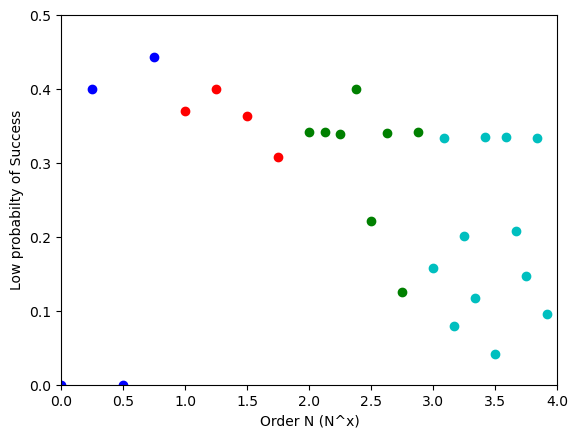

In [50]:
xPlotFraction = 1/len(lowSuccess)
xPlot1 = []


for u in range(len(lowSuccess)):
    xPlot1.append(xPlotFraction*u)

xPlotFraction2 = 1/len(lowSuccess2)
xPlot2 = []

for u2 in range(len(lowSuccess2)):
    xPlot2.append((xPlotFraction2*u2)+1)
    
xPlotFraction3 = 1/len(lowSuccess3)
xPlot3 = []

for u3 in range(len(lowSuccess3)):
    xPlot3.append((xPlotFraction3*u3)+2)

xPlotFraction4 = 1/len(lowSuccess4)
xPlot4 = []

for u4 in range(len(lowSuccess4)):
    xPlot4.append((xPlotFraction4*u4)+3)
    
    
print(lowSuccess)
plt.plot([xPlot1],[lowSuccess], 'bo',[xPlot2],[lowSuccess2], 'ro',
         [xPlot3],[lowSuccess3],'go',[xPlot4],[lowSuccess4],'co')
plt.axis([0, 4, 0.0, 0.5])
plt.xlabel("Order N (N^x)")
plt.ylabel("Low probabilty of Success")
plt.show()

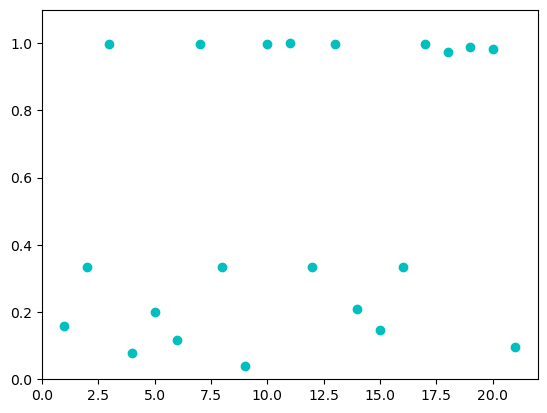

In [37]:
order5X=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
plt.plot([order5X], [tempSuccess4], 'co')
plt.axis([0,22,0,1.1])
plt.show()

[0.9, 0.923, 0.909, 0.208, 0.9, 0.041, 0.041, 0.9, 0.9, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.041, 0.9]


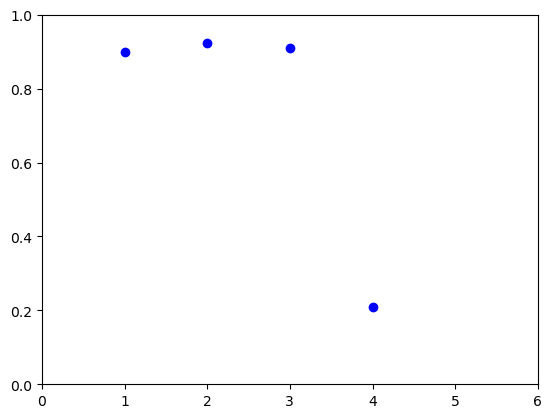

In [83]:
print(avgProbSuccess)

temp1N = avgProbSuccess[0]
temp2N = avgProbSuccess[1]
temp3N = avgProbSuccess[2]
temp4N = avgProbSuccess[3]
    
plt.plot([1,2,3,4],[temp1N,temp2N,temp3N,temp4N], 'bo')
plt.axis([0, 6, 0, 1])
plt.show()

In [366]:
tempN = [115,21,309,553,785,1037,1313,4101,7423,7427,7431,7435,7439,7441,7445,7447,7453,7463,7465,7471]
listOfR = []
rFactorPairs = {}
rEven={}
rOdd={}
primeFactors={}
demo=[]
r3Prob=[]
r3List=[]
dataFile = open(" multiples of 3.csv", 'w', newline='')

def EvenOddOrder(N):
#    guess = 2
    tempList = []
    bigOrder =[]
    evenCount= 0
    r3=0
    oddCount = 0
    evenProbList.clear()
    oddProbList.clear()
    if type(N) != list:
        tempList.append(N)
        N = tempList
    
    for iterateOverNList in range(len(N)):
        CurrentN = N[iterateOverNList]
        for guess in range(2,CurrentN):
            r = multiplicativeOrder(guess, CurrentN)
            writer.writerow([CurrentN, guess, r])   
            listOfR.append(r)
            
            if (r % 3)==0:
                    r3+=1    
                
            if (r % 2) == 0:
                evenCount = evenCount + 1
                #print(evenCount)
                
            elif r != -1:
                oddCount= oddCount+1
            
                #print(oddCount)
                
            else:
                primeFactors[CurrentN,guess]=(r)
            
#             guess = guess + 1
        total = evenCount + oddCount
        evenProb = evenCount/total
        oddProb = oddCount/total
        evenProbList.append(float(round((evenProb),3)))
        oddProbList.append(float(round((oddProb),3)))
        r3Calc = r3/total
        r3List.append(r3)
        print("For "+ str(CurrentN)+  ", there are "+ str(evenCount) +" even periods and "+str(oddCount)+" odd periods for a total of: "+str(total))
        print("Even: %.0f%%" % (100 * (evenCount/total))+" \n Odd: %.0f%%" % (100 * (oddCount/total)))
        print("Number of orders bigger than 2000: "+str(len(bigOrder)))
        if oddCount != 0:
            r3Prob.append(r3Calc)
            print(r3/total)
        else:
            r3Prob.append(-1)
            print("no odd")
        #print(evenProbList)
        #print(oddProbList)
        
        #print(bigOrder)
        evenCount=0
        oddCount = 0
        r3=0
        bigOrder = []
    totalEvenOrderAvg.append(float(round(Average(evenProbList),3)))
    totalOddOrderAvg.append(float(round(Average(oddProbList),3)))
    totalEvenList.append(evenProbList)
    totalOddList.append(oddProbList)
    #print("-0-0-0-0-0-0-0-0-0-0-0-0-")
    
    #print(totalEvenList)
    #print(totalOddList)
    
                
    return
totalEvenList=[]
writer = csv.writer(dataFile)
EvenOddOrder(nOrder1)
demo.append(totalEvenList)
print(evenProbList)
print("---")
print(r3Prob)
print("---")
print(r3List)
print("Odd and M3: "+str(Average(r3Prob)))
test_list = r3Prob
ele=-1
x=[i for i in test_list if i!=ele]
#print(x)

if len(x) !=0:
    r3Final = float(round(Average(x),3))
else:
    r3Final = ["No multiple of 3 orders"]
print(r3Final)


  

dataFile.close()

For 21, there are 9 even periods and 2 odd periods for a total of: 11
Even: 82% 
 Odd: 18%
Number of orders bigger than 2000: 0
0.7272727272727273
For 33, there are 15 even periods and 4 odd periods for a total of: 19
Even: 79% 
 Odd: 21%
Number of orders bigger than 2000: 0
0.0
For 35, there are 21 even periods and 2 odd periods for a total of: 23
Even: 91% 
 Odd: 9%
Number of orders bigger than 2000: 0
0.6956521739130435
For 39, there are 21 even periods and 2 odd periods for a total of: 23
Even: 91% 
 Odd: 9%
Number of orders bigger than 2000: 0
0.6956521739130435
For 51, there are 31 even periods and 0 odd periods for a total of: 31
Even: 100% 
 Odd: 0%
Number of orders bigger than 2000: 0
no odd
For 55, there are 35 even periods and 4 odd periods for a total of: 39
Even: 90% 
 Odd: 10%
Number of orders bigger than 2000: 0
0.0
For 57, there are 27 even periods and 8 odd periods for a total of: 35
Even: 77% 
 Odd: 23%
Number of orders bigger than 2000: 0
0.9142857142857143
For 65, t

In [312]:
# Odd and M3: 0.07987161657015164
# 0.08

EvenOddOrder(nOrder4)
print("-----Look----")
print(evenProbList)
print(oddProbList)
print("-----Look----")
temp1E = evenProbList

temp1O = oddProbList
print("N4E="+str(temp1E))
print("N4O="+str(temp1O))

For 10001, there are 9639 even periods and 152 odd periods for a total of: 9791
Even: 98% 
 Odd: 2%
Number of orders bigger than 2000: 0
For 10003, there are 7496 even periods and 1071 odd periods for a total of: 8567
Even: 87% 
 Odd: 13%
Number of orders bigger than 2000: 0
For 10015, there are 7006 even periods and 1001 odd periods for a total of: 8007
Even: 87% 
 Odd: 13%
Number of orders bigger than 2000: 5039
For 10019, there are 9134 even periods and 609 odd periods for a total of: 9743
Even: 94% 
 Odd: 6%
Number of orders bigger than 2000: 4031
For 10021, there are 6824 even periods and 2275 odd periods for a total of: 9099
Even: 75% 
 Odd: 25%
Number of orders bigger than 2000: 0
For 10027, there are 8504 even periods and 1215 odd periods for a total of: 9719
Even: 87% 
 Odd: 13%
Number of orders bigger than 2000: 0
For 10029, there are 5013 even periods and 1671 odd periods for a total of: 6684
Even: 75% 
 Odd: 25%
Number of orders bigger than 2000: 3336
For 10031, there are 8

In [321]:
#totalOddOrderAvg.append(float(round(Average(oddProbList),3)))

N1E=[0.818, 0.75, 0.87, 0.875, 0.968, 0.875, 0.771, 0.938, 0.767, 0.746, 0.984, 0.873, 0.875, 0.75, 0.875]
N1O=[0.182, 0.25, 0.13, 0.125, 0.032, 0.125, 0.229, 0.062, 0.233, 0.254, 0.016, 0.127, 0.125, 0.25, 0.125]

N2E=[0.887, 0.874, 0.968, 0.937, 0.75, 0.748, 0.747, 0.874, 0.937, 0.882, 0.937, 0.75, 0.749, 0.875, 0.749, 0.937, 0.992, 0.75, 0.984, 0.749, 0.875, 0.937, 0.501, 0.996, 0.751, 0.937, 0.937, 0.751, 0.75, 0.875]
N2O=[0.113, 0.126, 0.032, 0.063, 0.25, 0.252, 0.253, 0.126, 0.063, 0.118, 0.063, 0.25, 0.251, 0.125, 0.251, 0.063, 0.008, 0.25, 0.016, 0.251, 0.125, 0.063, 0.499, 0.004, 0.249, 0.063, 0.063, 0.249, 0.25, 0.125]

N3E=[0.97, 0.969, 0.875, 0.984, 0.75, 0.875, 0.876, 0.875, 0.751, 0.984, 0.75, 0.875, 0.875, 0.875, 0.937, 0.875, 0.996, 0.875, 0.75, 0.875, 0.75, 0.969, 0.875, 0.937, 0.998, 0.75, 0.984, 0.75, 0.875, 0.999]
N3O=[0.03, 0.031, 0.125, 0.016, 0.25, 0.125, 0.124, 0.125, 0.249, 0.016, 0.25, 0.125, 0.125, 0.125, 0.063, 0.125, 0.004, 0.125, 0.25, 0.125, 0.25, 0.031, 0.125, 0.063, 0.002, 0.25, 0.016, 0.25, 0.125, 0.001]

N4E=[0.984, 0.875, 0.875, 0.937, 0.75, 0.875, 0.75, 0.937, 0.75, 0.75, 0.75, 0.875, 0.875, 0.75, 0.969, 0.75, 0.875, 0.75, 0.984, 0.875, 0.875, 0.969, 0.937, 0.999, 0.992, 0.875, 0.969, 0.75]
N4O=[0.016, 0.125, 0.125, 0.063, 0.25, 0.125, 0.25, 0.063, 0.25, 0.25, 0.25, 0.125, 0.125, 0.25, 0.031, 0.25, 0.125, 0.25, 0.016, 0.125, 0.125, 0.031, 0.063, 0.001, 0.008, 0.125, 0.031, 0.25]

N5E=[0.75, 0.984, 0.75, 0.969, 0.875, 0.75, 0.875, 0.75, 0.996
     , 0.75, 0.875, 0.875, 0.875, 0.938, 0.969, 0.75, 0.984, 0.875, 0.875, 0.75, 0.875]
N5O=[0.25, 0.016, 0.25, 0.031, 0.125, 0.25, 0.125, 0.25, 0.004, 
     0.25, 0.125, 0.125, 0.125, 0.062, 0.031, 0.25, 0.016, 0.125, 0.125, 0.25, 0.125]
print(Average(N5E))
print(Average(N5O))
completeList = []
completeList.append(N1E)
completeList.append(N2E)
completeList.append(N3E)
completeList.append(N4E)
completeList.append(N5E)
print(completeList)
flatten_list = list(chain.from_iterable(completeList))

completeListO = []
completeListO.append(N1O)
completeListO.append(N2O)
completeListO.append(N3O)
completeListO.append(N4O)
completeListO.append(N5O)
print(completeListO)
flatten_listO = list(chain.from_iterable(completeListO))
print(flatten_list)
print(flatten_listO)
print(len(flatten_listO))

0.8614285714285714
0.13857142857142857
[[0.818, 0.75, 0.87, 0.875, 0.968, 0.875, 0.771, 0.938, 0.767, 0.746, 0.984, 0.873, 0.875, 0.75, 0.875], [0.887, 0.874, 0.968, 0.937, 0.75, 0.748, 0.747, 0.874, 0.937, 0.882, 0.937, 0.75, 0.749, 0.875, 0.749, 0.937, 0.992, 0.75, 0.984, 0.749, 0.875, 0.937, 0.501, 0.996, 0.751, 0.937, 0.937, 0.751, 0.75, 0.875], [0.97, 0.969, 0.875, 0.984, 0.75, 0.875, 0.876, 0.875, 0.751, 0.984, 0.75, 0.875, 0.875, 0.875, 0.937, 0.875, 0.996, 0.875, 0.75, 0.875, 0.75, 0.969, 0.875, 0.937, 0.998, 0.75, 0.984, 0.75, 0.875, 0.999], [0.984, 0.875, 0.875, 0.937, 0.75, 0.875, 0.75, 0.937, 0.75, 0.75, 0.75, 0.875, 0.875, 0.75, 0.969, 0.75, 0.875, 0.75, 0.984, 0.875, 0.875, 0.969, 0.937, 0.999, 0.992, 0.875, 0.969, 0.75], [0.75, 0.984, 0.75, 0.969, 0.875, 0.75, 0.875, 0.75, 0.996, 0.75, 0.875, 0.875, 0.875, 0.938, 0.969, 0.75, 0.984, 0.875, 0.875, 0.75, 0.875]]
[[0.182, 0.25, 0.13, 0.125, 0.032, 0.125, 0.229, 0.062, 0.233, 0.254, 0.016, 0.127, 0.125, 0.25, 0.125], [0.113,

15, 15
30, 30
30, 30
28, 28
21, 21
[[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333], [1.0, 1.0333333333333334, 1.0666666666666667, 1.1, 1.1333333333333333, 1.1666666666666667, 1.2, 1.2333333333333334, 1.2666666666666666, 1.3, 1.3333333333333333, 1.3666666666666667, 1.4, 1.4333333333333333, 1.4666666666666668, 1.5, 1.5333333333333332, 1.5666666666666667, 1.6, 1.6333333333333333, 1.6666666666666665, 1.7, 1.7333333333333334, 1.7666666666666666, 1.8, 1.8333333333333335, 1.8666666666666667, 1.9, 1.9333333333333333, 1.9666666666666668], [2.0, 2.033333333333333, 2.066666666666667, 2.1, 2.1333333333333333, 2.1666666666666665, 2.2, 2.2333333333333334, 2.2666666666666666, 2.3, 2.3333333333333335, 2.3666666666666667, 2.4, 2.4333333333333336, 2.466666666666667, 2.5, 2.533333333333333, 2.5666666666666664, 2.6, 2.63333333

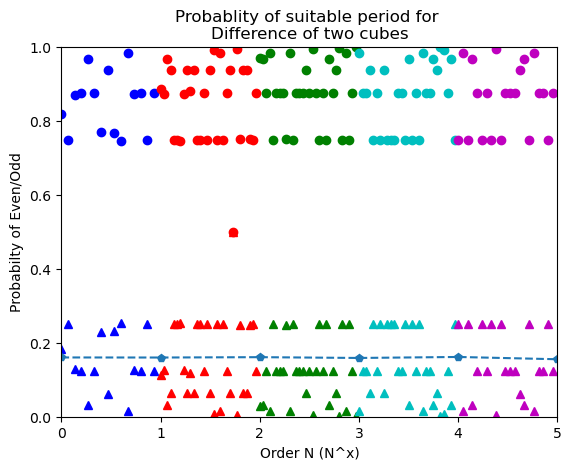

In [314]:




xPlotFraction = 1/len(N1E)
xPlot1 = []
totalXAxis = []
for u in range(len(N1E)):
    xPlot1.append(xPlotFraction*u)
    
xPlotFraction2 = 1/len(N2E)
xPlot2 = []
totalXAxis.append(xPlot1)
for u2 in range(len(N2E)):
    xPlot2.append((xPlotFraction2*u2)+1)
    
xPlotFraction3 = 1/len(N3E)
xPlot3 = []
totalXAxis.append(xPlot2)
for u3 in range(len(N3E)):
    xPlot3.append((xPlotFraction3*u3)+2)

xPlotFraction4 = 1/len(N4E)
xPlot4 = []
totalXAxis.append(xPlot3)
for u4 in range(len(N4E)):
    xPlot4.append((xPlotFraction4*u4)+3)
    
totalXAxis.append(xPlot4)  

xPlotFraction5 = 1/len(N5E)
xPlot5 = []

for u5 in range(len(N5E)):
    xPlot5.append((xPlotFraction5*u5)+4)
    
totalXAxis.append(xPlot5)
print(str(len(N1E))+", " +str(len(xPlot1)))
print(str(len(N2E))+", " +str(len(xPlot2)))
print(str(len(N3E))+", " +str(len(xPlot3)))
print(str(len(N4E))+", " +str(len(xPlot4)))
print(str(len(N5E))+", " +str(len(xPlot5)))

print(totalXAxis)
flatten_totalX = list(chain.from_iterable(totalXAxis))
print(flatten_totalX)
print(len(flatten_totalX))
#plt.plot([xPlot1],[N1E], 'bo',[xPlot2],[N2E], 'ro',[xPlot3],[N4E],'go'
#,[xPlot1],[temp1O], 'b^',[xPlot2],[temp2O], 'r^',[xPlot3],[temp3O], 'g^')
   

z = np.polyfit(flatten_totalX, flatten_listO, 5)
#zz = np.polyfit(flatten_totalX, flatten_listO, 1)
p = np.poly1d(z)    
#plt.plot(x, p(x), color="purple", linewidth=3, linestyle="--")   


plt.plot([xPlot1],[N1E], 'bo',[xPlot2],[N2E], 'ro',[xPlot3],[N3E],'go',[xPlot4],[N4E],'co',[xPlot5],[N5E],'mo'
        ,[xPlot1],[N1O], 'b^',[xPlot2],[N2O], 'r^',[xPlot3],[N3O], 'g^',[xPlot4],[N4O], 'c^',[xPlot5],[N5O],'m^', 
         p(z), 'p', linestyle = "--") 
plt.axis([0, 5, 0, 1])
plt.title("Probablity of suitable period for \nDifference of two cubes")
plt.xlabel("Order N (N^x)")
plt.ylabel("Probabilty of Even/Odd")



# Add the trendlines to the plot
#plt.plot([xPlot1,xPlot2,xPlot3,xPlot4], p1E([xPlot1,xPlot2,xPlot3,xPlot4]), "b--")
#plt.plot([xPlot1,xPlot2,xPlot3,xPlot4], p1O([xPlot1,xPlot2,xPlot3,xPlot4]), "r--")

plt.show()


C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\polynomial.py:621: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = NX.asarray(x) + 0.0


TypeError: can only concatenate list (not "float") to list

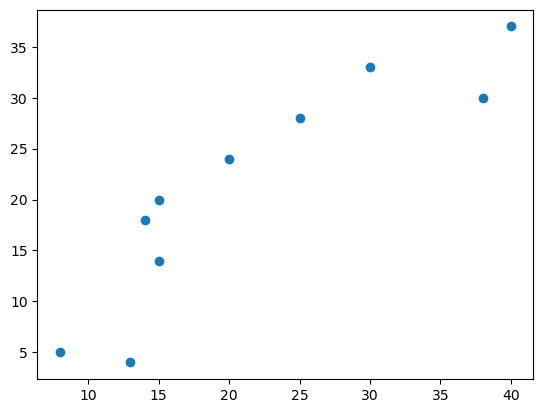

In [315]:
x = np.array([8, 13, 14, 15, 15, 20, 25, 30, 38, 40])
y = np.array([5, 4, 18, 14, 20, 24, 28, 33, 30, 37])
f = np.array([4,3,6,4,3,6,4,6,3,2])
d = np.array([4,3,6,4,3,6,4,6,3,2])

#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(completeListO, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(completeListO, p(x))

In [54]:
#print(rEven)

In [55]:
#print(rOdd)

In [56]:
#print(primeFactors)

In [16]:
rOddInSFA={}
rEvenTest={}
primeFactorsTest={}
squareList=[]
squareDict = {}
squareTrivial =[]
squareMulti = []
attemptInDTC=[]
successInDTC={}
def OddInStandard(N):
    
    guess = 2
    tempList = []
    evenCount= 0
    oddCount = 0
    if type(N) != list:
        tempList.append(N)
        N = tempList
    
    for z in range(len(N)):
        CurrentN = N[z]
        for listOfA in range(CurrentN-1):
            sqrA = math.sqrt(guess)
            if int(sqrA + 0.5) ** 2 == guess:
                #print(str(sqrA)+", "+str(guess))
                squareList.append(guess)
                
                
                r = multiplicativeOrder(guess, CurrentN)
                listOfR.append(r)

                if (r % 2) == 0:
                    
                    print("even order")
                    factors=(SFAcalculateFactors(CurrentN, guess, r))
                    #print(factors)
                    #rFactorPairs[CurrentN, guess] = (r,factors)
                    rEvenTest[CurrentN, guess] = (r, factors)
                    evenCount = evenCount + 1
                    #print(evenCount)
                    

                elif r != -1:
                    #print("odd order")
                    
                    #if (((int(sqrA))**(r)).is_integer()) == True:
                    factors=(SFAcalculateFactors(CurrentN, guess, r))
                    if factors[0] == 1:
                        print("trivial: " + str(factors))
                        squareTrivial.append(guess)
                        diffFactors=(DOTCcalculateFactors(CurrentN, guess, r))
                        #print(diffFactors)
                        if factors[0] == 1:
                            attemptInDTC.append(guess)
                                
                        else:
                            successInDTC[guess] = (diffFactors)
                            
                    else:
                        #print("factors found: "+str(factors))
                        squareDict[guess] = (factors)
                        
                    #rFactorPairs[CurrentN, guess] = (r,factors)
                    #rOddInSFA[CurrentN, guess] = (r, factors)
                    oddCount= oddCount+1
                    #print(oddCount)
                        
                            
                    #else:
                        #print("Odd order cannot work in standard")

                else:
                    #print("Either factor or multiple of factor: "+str(CurrentN)+", "+str(guess)+" --> gcd = "+str(GCD(guess, CurrentN)))
                    #primeFactorsTest[CurrentN,guess]=(r)
                    squareMulti.append(guess)
            
            guess = guess + 1
        #total = evenCount + oddCount
        #print("For "+ str(CurrentN)+  ", there are "+ str(evenCount) +" even periods and "+str(oddCount)+" odd periods for a total of: "+str(total))
       # print("Even: %.0f%%" % (100 * (evenCount/total))+" \n Odd: %.0f%%" % (100 * (oddCount/total)))
        evenCount=0
        oddCount = 0
        
            
    return [rEvenTest, rOddInSFA]
inputN=4197
OddInStandard(inputN)

print("for N = "+str(inputN)+", "+str(len(squareList))+" total square number guesses")
print(str(len(squareDict))+" guesses that found factors: "+str(squareDict))
print(str(len(squareTrivial))+" guesses that found trivial factors: "+str(squareTrivial))
print(str(len(squareMulti))+" guesses that were already either a factor or a multiple of a factor"+str(squareMulti))
print("--------------")
print("Of the failed guesses in standard, "+str(len(attemptInDTC))+ " also didnt find factors: "+str(attemptInDTC))
print("But "+ str(len(successInDTC))+" did find factors: "+str(successInDTC))

for N = 4197, 63 total square number guesses
42 guesses that found factors: {4: [3, 1399], 16: [3, 1399], 25: [3, 1399], 49: [3, 1399], 64: [3, 1399], 100: [3, 1399], 121: [3, 1399], 169: [3, 1399], 196: [3, 1399], 256: [3, 1399], 289: [3, 1399], 361: [3, 1399], 400: [3, 1399], 484: [3, 1399], 529: [3, 1399], 625: [3, 1399], 676: [3, 1399], 784: [3, 1399], 841: [3, 1399], 961: [3, 1399], 1024: [3, 1399], 1156: [3, 1399], 1225: [3, 1399], 1369: [3, 1399], 1444: [3, 1399], 1600: [3, 1399], 1681: [3, 1399], 1849: [3, 1399], 1936: [3, 1399], 2116: [3, 1399], 2209: [3, 1399], 2401: [3, 1399], 2500: [3, 1399], 2704: [3, 1399], 2809: [3, 1399], 3025: [3, 1399], 3136: [3, 1399], 3364: [3, 1399], 3481: [3, 1399], 3721: [3, 1399], 3844: [3, 1399], 4096: [3, 1399]}
0 guesses that found trivial factors: []
21 guesses that were already either a factor or a multiple of a factor[9, 36, 81, 144, 225, 324, 441, 576, 729, 900, 1089, 1296, 1521, 1764, 2025, 2304, 2601, 2916, 3249, 3600, 3969]
-----------

In [59]:
rOddInSFA={}
rEvenTest={}
primeFactorsTest={}
squareList=[]
squareDict = {}
squareTrivial =[]
squareMulti = []
attemptInDTC=[]
successInDTC={}

def squareADTC(N):
    
    guess = 2
    tempList = []
    evenCount= 0
    oddCount = 0
    if type(N) != list:
        tempList.append(N)
        N = tempList
    
    for z in range(len(N)):
        CurrentN = N[z]
        for listOfA in range(CurrentN-1):
            sqrA = math.sqrt(guess)
            if int(sqrA + 0.5) ** 2 == guess:
                #print(guess)
                squareList.append(guess)
                
                
                r = multiplicativeOrder(guess, CurrentN)
                listOfR.append(r)

                if (r % 2) == 0:
                    
                    #print("even order")
                    #factors=(SFAcalculateFactors(CurrentN, guess, r))
                    #print(factors)
                    #rFactorPairs[CurrentN, guess] = (r,factors)
                    #rEvenTest[CurrentN, guess] = (r, factors)
                    evenCount = evenCount + 1
                    #print(evenCount)
                    

                elif r != -1:
                    #print("odd order")
                    factors=(DOTCcalculateFactors(CurrentN, guess, r))
                    if factors[0] == 1:
                        #print("trivial: " + str(factors))
                        squareTrivial.append(guess)
                            
                    else:
                        #print("factors found: "+str(factors))
                        squareDict[guess] = (factors)
                        
                    #rFactorPairs[CurrentN, guess] = (r,factors)
                    #rOddInSFA[CurrentN, guess] = (r, factors)
                    oddCount= oddCount+1
                    #print(oddCount)
                        

                else:
                    #print("Either factor or multiple of factor: "+str(CurrentN)+", "+str(guess)+" --> gcd = "+str(GCD(guess, CurrentN)))
                    #primeFactorsTest[CurrentN,guess]=(r)
                    squareMulti.append(guess)
            
            guess = guess + 1
        #total = evenCount + oddCount
        #print("For "+ str(CurrentN)+  ", there are "+ str(evenCount) +" even periods and "+str(oddCount)+" odd periods for a total of: "+str(total))
       #print("Even: %.0f%%" % (100 * (evenCount/total))+" \n Odd: %.0f%%" % (100 * (oddCount/total)))
        total = evenCount + oddCount
        print("For "+ str(CurrentN)+  ", there are "+ str(evenCount) +" even periods and "+str(oddCount)+" odd periods for a total of: "+str(total))
        print("Even: %.0f%%" % (100 * (evenCount/total))+" \n Odd: %.0f%%" % (100 * (oddCount/total)))
        evenCount=0
        oddCount = 0
        
            
    return [rEvenTest, rOddInSFA]
inputN=4015
squareADTC(inputN)

print("for N = "+str(inputN)+", "+str(len(squareList))+" total square number guesses")
print(str(len(squareDict))+" guesses that found factors: "+str(squareDict))
print(str(len(squareTrivial))+" guesses that found trivial factors: "+str(squareTrivial))
print(str(len(squareMulti))+" guesses that are not coprime (gcd(a,N)!=1): "+str(squareMulti))
print("--------------")
#print("Of the failed guesses in standard, "+str(len(attemptInDTC))+ " also didnt find factors: "+str(attemptInDTC))
#print("But "+ str(len(successInDTC))+" did find factors: "+str(successInDTC))

For 4015, there are 41 even periods and 5 odd periods for a total of: 46
Even: 89% 
 Odd: 11%
for N = 4015, 62 total square number guesses
5 guesses that found factors: {16: [5, 803], 81: [5, 803], 256: [5, 803], 1296: [5, 803], 1681: [5, 803]}
0 guesses that found trivial factors: []
16 guesses that are not coprime (gcd(a,N)!=1): [25, 100, 121, 225, 400, 484, 625, 900, 1089, 1225, 1600, 1936, 2025, 2500, 3025, 3600]
--------------


In [194]:
b = 25
sqrtB = math.sqrt(b)
print(int(sqrtB))

5


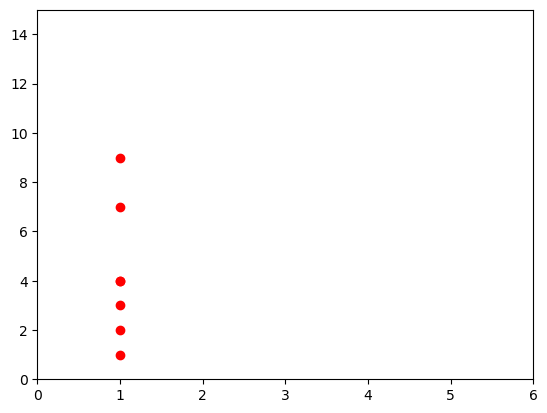

In [13]:
plt.plot([(1),(1)], [(1, 4, 9, 16),(4,7,2,3)], 'ro')
plt.axis([0, 6, 0, 15])
plt.show()

In [101]:
list2d=[[1,2,3],[4,5,6]]
print(type(list2d))

<class 'list'>


In [ ]:
['77,4, 15|||', '77,9, 15|||', '77,16, 15|||', '77,25, 15|||', '77,37, 15|||', '77,53, 15|||', '77,58, 15|||', 
 '77,60, 15|||', '91,9, 3|||', '91,16, 3|||', '91,74, 3|||', '91,81, 3|||']

Odd order(3): [3, 7]


In [86]:
1011,29,336

(1011, 29, 336)

In [ ]:
EvenOddOrder(nOrder1)
print(evenProbList)
print(oddProbList)
print("-----Look----")
print(totalEvenList)
print(totalOddList)
print("-----Look----")
temp1E = evenProbList

temp1O = oddProbList
print(temp1E)
print(temp1O)
print("-----Look----")
totalEvenList = []
totalOddList=[]
EvenOddOrder(nOrder2)
print(evenProbList)
print(oddProbList)
temp2E = evenProbList

temp2O = oddProbList
totalEvenList = []
totalOddList=[]

EvenOddOrder(nOrder3)
print(evenProbList)
print(oddProbList)
temp3E = evenProbList

temp3O = oddProbList
totalEvenList = []
totalOddList=[]

#EvenOddOrder(nOrder4)
#temp4E = evenProbList
#evenProbList.clear()
#temp4O = oddProbList
#oddProblist.clear()
print(str(len(xPlot1))+","+str(len(temp1E)))
print(str(len(xPlot2))+","+str(len(temp2E)))
print(str(len(xPlot3))+","+str(len(temp3E)))

print(temp1E)
print(temp2E)
print(temp3E)

-----------------------
def bigRunNOrders():
    bigRun(nOrder1)
    tempSuccess1 = successProbList
    successProbList=[]
    bigRun(nOrder2)
    tempSuccess2 = successProbList
    successProbList=[]

    bigRun(nOrder3)
    tempSuccess3 = successProbList
    successProbList=[]
    
    bigRun(nOrder4)
    tempSuccess4 = successProbList
    successProbList=[]
    
    
    print(tempSuccess1)
    print(tempSuccess2)
    print(tempSuccess3)
    print(tempSuccess4)

    plt.plot([1],[tempSuccess1], 'bo',[2],[tempSuccess2], 'ro',[3],[tempSuccess3],'go',[4],[tempSuccess4],'po') 
    plt.axis([0, 6, 0, 1.5])
    plt.xlabel("Order N (N^x)")
    plt.ylabel("Probabilty of Success")
    plt.show()
    

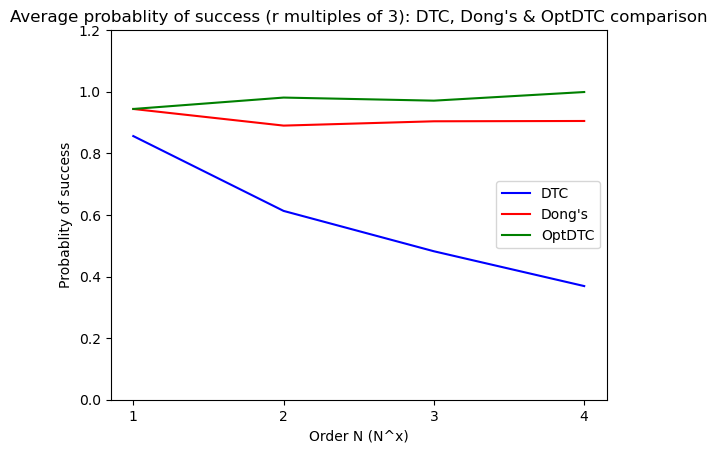

In [2]:
#GRAPHS

dtcProb = [0.856,0.613,0.482,0.369]
dongProb = [0.944,0.890,0.904,0.905]
optProb = [0.944,0.981,0.971,0.999]
# plt.plot([xPlot1],[N1E], 'bo',[xPlot2],[N2E], 'ro',[xPlot3],[N3E],'go',[xPlot4],[N4E],'co',[xPlot5],[N5E],'mo'
#         ,[xPlot1],[N1O], 'b^',[xPlot2],[N2O], 'r^',[xPlot3],[N3O], 'g^',[xPlot4],[N4O], 'c^',[xPlot5],[N5O],'m^', 
#          p(z), 'p', linestyle = "--") 
# plt.axis([0, 4, 0, 1])
# plt.title("Probablity of suitable period for \nDifference of two cubes")
# plt.xlabel("Order N (N^x)")
# plt.ylabel("Probabilty of Even/Odd")



# # Add the trendlines to the plot
# #plt.plot([xPlot1,xPlot2,xPlot3,xPlot4], p1E([xPlot1,xPlot2,xPlot3,xPlot4]), "b--")
# #plt.plot([xPlot1,xPlot2,xPlot3,xPlot4], p1O([xPlot1,xPlot2,xPlot3,xPlot4]), "r--")

# plt.show()

x1 = np.array([1,2,3,4])
x2 = np.array([1,2,3,4])
y1 = np.array(dtcProb)
y2 = np.array(dongProb)
x3 = np.array([1,2,3,4])
y3 = np.array(optProb)
#plt.axis([0,5,0,1])
plt.xticks([1,2,3,4])
# plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylim(0, 1.2)
#plt.xlim(1,4)

plt.plot(x1,y1,'-b',label="DTC")
plt.plot(x2,y2,'-r',label="Dong's")
plt.plot(x3,y3,'-g',label="OptDTC")
plt.plot()
plt.title("Average probablity of success (r multiples of 3): DTC, Dong's & OptDTC comparison")
plt.xlabel("Order N (N^x)")
plt.ylabel("Probablity of success")
# plt.plot(x, y1, "-b", label="sine")
# plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="right")
plt.show()

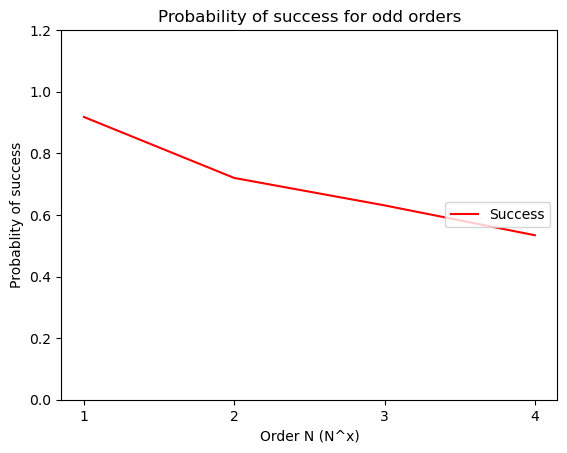

In [13]:
#GRAPHS

Success = [0.918,0.720,0.631,0.534]
#Fail = [0.082,0.280,0.369,0.466]
x1 = np.array([1,2,3,4])
x2 = np.array([1,2,3,4])
y1 = np.array(Success)
y2 = np.array(Fail)

#plt.axis([0,5,0,1])
plt.xticks([1,2,3,4])
# plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.ylim(0, 1.2)
#plt.xlim(1,4)

plt.plot(x1,y1,'-r',label="Success")
#plt.plot(x2,y2,'-b',label="Fail")

plt.plot()
plt.title("Probability of success for odd orders")
plt.xlabel("Order N (N^x)")
plt.ylabel("Probablity of success")
# plt.plot(x, y1, "-b", label="sine")
# plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="right")
plt.show()